In [1]:
import torch
import pandas as pd
import numpy as np
import torchvision
import PIL
from PIL import Image


In [2]:
from src.utils.dataset import get_dataloader

dl, vocab = get_dataloader('data/train_filter.lst', 'data/images_processed/', 'data/formulas_tokenized.lst', 'data/latex_vocab.txt', 'cpu')

In [3]:
%%time
for b in dl:
    batch = b
    break
batch['tokens']

CPU times: user 19.6 ms, sys: 8.5 ms, total: 28.1 ms
Wall time: 19.6 ms


tensor([[529, 544, 523, 552,  47, 560,  74,   6,  38,  11, 552, 542, 528, 540,
         544, 477, 377, 543, 560,   7, 523, 552,  47, 377,  38,   9, 158, 523,
         552,  47, 560, 560, 296, 529, 543, 523,  47,   9, 543, 523,  47, 529,
         477, 523,  47,   9, 543, 523,  47, 544, 534, 539, 523,  47, 477, 529,
         495, 523,  47, 407,  11, 552, 529, 545, 523,  47, 377,   6,  38,  11,
         552, 542, 528, 540, 544, 477, 377, 543, 560,   7, 523, 552,  47, 377,
          38,   9, 158, 523, 552,  47, 560, 560, 560, 111,  20,   0]])

In [4]:
%%time
from src.model.model import AttentionOCR

model = AttentionOCR(len(dl.dataset.vocab))
res = model(batch)
res.shape

CPU times: user 9.06 s, sys: 1.26 s, total: 10.3 s
Wall time: 8.36 s


torch.Size([96, 562])

In [81]:
img = Image.open('data/example2.png').convert('L')
# img = img.resize((img.size[0] // 2, img.size[1] // 2), Image.LANCZOS)
type(img)

PIL.Image.Image

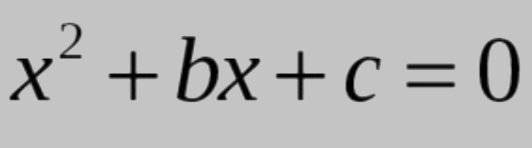

In [13]:
img_np = np.array(img)
img_np[img_np > 196] = 196
# img_np[img_np < 106] = 0
Image.fromarray(img_np)

In [14]:
from torchvision.transforms import Normalize, ToTensor, Compose

trans = Compose([ToTensor()])
ten = trans(Image.fromarray(img_np))
ten

tensor([[[0.7686, 0.7686, 0.7686,  ..., 0.7686, 0.7686, 0.7686],
         [0.7686, 0.7686, 0.7686,  ..., 0.7686, 0.7686, 0.7686],
         [0.7686, 0.7686, 0.7686,  ..., 0.7686, 0.7686, 0.7686],
         ...,
         [0.7686, 0.7686, 0.7686,  ..., 0.7686, 0.7686, 0.7686],
         [0.7686, 0.7686, 0.7686,  ..., 0.7686, 0.7686, 0.7686],
         [0.7686, 0.7686, 0.7686,  ..., 0.7686, 0.7686, 0.7686]]])

In [14]:
a = torch.ones((3)).long()
b = torch.ones((3, 5))
# b[:,2:] = 0
# b[:,0] = 0
l = torch.nn.NLLLoss()
l(res, batch['tokens'].squeeze()), b, a

(tensor(6.3705, grad_fn=<NllLossBackward>),
 tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
 tensor([1, 1, 1]))

In [34]:
torch.argmax(torch.tensor([[1, 2], [4, 3]]), 1)

tensor([1, 0])

In [71]:
bleu_score.sentence_bleu([np.array([1, 2])], np.array([1, 2, 4]), (1,))

0.6666666666666666

In [20]:
from nltk.translate import bleu_score
?bleu_score.sentence_bleu

Signature:
bleu_score.sentence_bleu(
    references,
    hypothesis,
    weights=(0.25, 0.25, 0.25, 0.25),
    smoothing_function=None,
    auto_reweigh=False,
)
Docstring:
Calculate BLEU score (Bilingual Evaluation Understudy) from
Papineni, Kishore, Salim Roukos, Todd Ward, and Wei-Jing Zhu. 2002.
"BLEU: a method for automatic evaluation of machine translation."
In Proceedings of ACL. http://www.aclweb.org/anthology/P02-1040.pdf

>>> hypothesis1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'which',
...               'ensures', 'that', 'the', 'military', 'always',
...               'obeys', 'the', 'commands', 'of', 'the', 'party']

>>> hypothesis2 = ['It', 'is', 'to', 'insure', 'the', 'troops',
...               'forever', 'hearing', 'the', 'activity', 'guidebook',
...               'that', 'party', 'direct']

>>> reference1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'that',
...               'ensures', 'that', 'the', 'military', 'will', 'forever',
...               'heed', 'Party',